<a href="https://colab.research.google.com/github/nisha1365/THINK-BAYES/blob/main/Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for empiricaldist: filename=empiricaldist-0.6.7-py3-none-any.whl size=11972 sha256=80e9e7c07986e6135b74507edb463f8e44d99f23496cd7bbf1e556802b481ad3
  Stored in directory: /root/.cache/pip/wheels/dd/dc/1c/c472efa84814edbb5b67d132ad3950534d0d7fd808543a659c
Successfully built empiricaldist


In [2]:
# Get utils.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkBayes2/raw/master/soln/utils.py')

Downloaded utils.py


In [3]:
from utils import set_pyplot_params
set_pyplot_params()

PMF

In [4]:
from empiricaldist import Pmf

The following example makes a Pmf that represents the outcome of a coin toss.



In [5]:
coin = Pmf()
coin['heads'] = 1/2
coin['tails'] = 1/2
coin

,probs
heads,0.5
tails,0.5


The following example uses Pmf.from_seq to make a Pmf that represents a six-sided die.

In [6]:
die = Pmf.from_seq([1,2,3,4,5,6])
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In this example, all outcomes in the sequence appear once, so they all have the same probability, 1/6

In [7]:
letters = Pmf.from_seq(list('Mississippi'))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


letters['s']

In [8]:
letters['s']

0.36363636363636365

In the word "Mississippi", about 36% of the letters are "s".

However, if you ask for the probability of a quantity that's not in the distribution, you get a KeyError.

In [9]:
try:
    letters['t']
except KeyError as e:
    print(type(e))

<class 'KeyError'>


In [10]:
letters('s')

0.36363636363636365

In [11]:
letters('t')

0

The Cookie Problem Revisited

In this section I'll use a Pmf to solve the cookie problem from <<_TheCookieProblem>>. Here's the statement of the problem again:

Suppose there are two bowls of cookies.

Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies.

Bowl 2 contains 20 vanilla cookies and 20 chocolate cookies.

Here's a Pmf that represents the two hypotheses and their prior probabilities:

In [12]:
prior = Pmf.from_seq(['Bowl 1', 'Bowl 2'])
prior

,probs
Bowl 1,0.5
Bowl 2,0.5


This distribution, which contains the prior probability for each hypothesis, is called (wait for it) the prior distribution.

To update the distribution based on new data (the vanilla cookie), we multiply the priors by the likelihoods. The likelihood of drawing a vanilla cookie from Bowl 1 is 3/4. The likelihood for Bowl 2 is 1/2.

In [13]:
likelihood_vanilla = [0.75, 0.5]
posterior = prior * likelihood_vanilla
posterior

,probs
Bowl 1,0.375
Bowl 2,0.250


The result is the unnormalized posteriors; that is, they don't add up to 1. To make them add up to 1, we can use normalize, which is a method provided by Pmf.

In [14]:
posterior.normalize()

0.625

In [15]:
posterior

,probs
Bowl 1,0.6
Bowl 2,0.4


In [16]:
posterior('Bowl 1')

0.6

In [17]:
posterior *= likelihood_vanilla
posterior.normalize()
posterior

,probs
Bowl 1,0.692308
Bowl 2,0.307692


Here are the likelihoods for the new data:

In [19]:
likelihood_chocolate = [0.25, 0.5]

In [20]:
posterior *= likelihood_chocolate
posterior.normalize()
posterior

,probs
Bowl 1,0.529412
Bowl 2,0.470588


101 Bowls
Next let's solve a cookie problem with 101 bowls:

Bowl 0 contains 0% vanilla cookies,

Bowl 1 contains 1% vanilla cookies,

Bowl 2 contains 2% vanilla cookies,

and so on, up to

Bowl 99 contains 99% vanilla cookies, and

Bowl 100 contains all vanilla cookies.

To solve this problem, I'll use np.arange to make an array that represents 101 hypotheses, numbered from 0 to 100.

In [21]:
import numpy as np

hypos = np.arange(101)

We can use this array to make the prior distribution:

In [22]:
prior = Pmf(1, hypos)
prior.normalize()

101

In [23]:
prior.head()

,probs
0,0.009901
1,0.009901
2,0.009901


The likelihood of the data is the fraction of vanilla cookies in each bowl, which we can calculate using hypos:

In [24]:
likelihood_vanilla = hypos/100
likelihood_vanilla[:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

Now we can compute the posterior distribution in the usual way:

In [25]:
posterior1 = prior * likelihood_vanilla
posterior1.normalize()
posterior1.head()

,probs
0,0.000000
1,0.000198
2,0.000396


The following figure shows the prior distribution and the posterior distribution after one vanilla cookie.

In [26]:
from utils import decorate

def decorate_bowls(title):
    decorate(xlabel='Bowl #',
             ylabel='PMF',
             title=title)

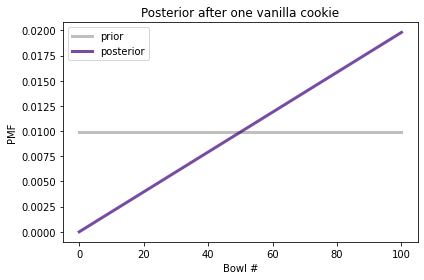

In [27]:
prior.plot(label='prior', color='C5')
posterior1.plot(label='posterior', color='C4')
decorate_bowls('Posterior after one vanilla cookie')

The posterior probability of Bowl 0 is 0 because it contains no vanilla cookies. The posterior probability of Bowl 100 is the highest because it contains the most vanilla cookies. In between, the shape of the posterior distribution is a line because the likelihoods are proportional to the bowl numbers.

Now suppose we put the cookie back, draw again from the same bowl, and get another vanilla cookie. Here's the update after the second cookie:

In [28]:
posterior2 = posterior1 * likelihood_vanilla
posterior2.normalize()

0.6699999999999999

And here's what the posterior distribution looks like.

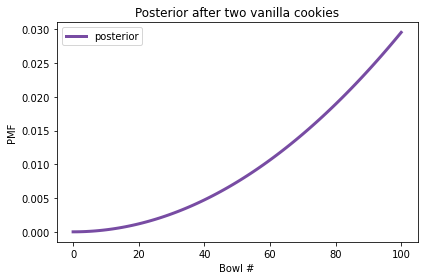

In [29]:
posterior2.plot(label='posterior', color='C4')
decorate_bowls('Posterior after two vanilla cookies')

But suppose we draw again and get a chocolate cookie. Here's the update:

In [30]:
likelihood_chocolate = 1 - hypos/100

posterior3 = posterior2 * likelihood_chocolate
posterior3.normalize()

0.2462686567164179

And here's the posterior distribution.

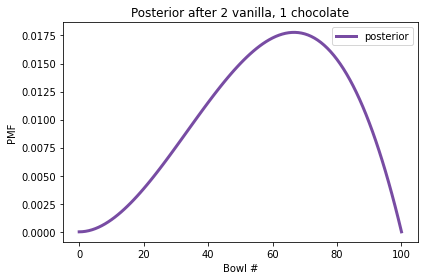

In [31]:
posterior3.plot(label='posterior', color='C4')
decorate_bowls('Posterior after 2 vanilla, 1 chocolate')

The quantity with the highest posterior probability is called the MAP, which stands for "maximum a posteriori probability", where "a posteriori" is unnecessary Latin for "posterior".

To compute the MAP, we can use the Series method idxmax:

In [32]:
posterior3.idxmax()

67

The Dice Problem

Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die. I choose one of the dice at random, roll it, and report that the outcome is a 1. What is the probability that I chose the 6-sided die?

In [33]:
hypos = [6, 8, 12]

We can make the prior distribution like this:

In [34]:
prior = Pmf(1/3, hypos)
prior

,probs
6,0.333333
8,0.333333
12,0.333333


As in the previous example, the prior probability gets broadcast across the hypotheses. The Pmf object has two attributes:

qs contains the quantities in the distribution;

ps contains the corresponding probabilities.

In [35]:
prior.qs

array([ 6,  8, 12])

In [36]:
prior.ps

array([0.33333333, 0.33333333, 0.33333333])

Now we're ready to do the update. Here's the likelihood of the data for each hypothesis.

In [37]:
likelihood1 = 1/6, 1/8, 1/12

And here's the update.

In [38]:
posterior = prior * likelihood1
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


Now suppose I roll the same die again and get a 7. Here are the likelihoods:

In [39]:
likelihood2 = 0, 1/8, 1/12

The likelihood for the 6-sided die is 0 because it is not possible to get a 7 on a 6-sided die. The other two likelihoods are the same as in the previous update.

Here's the update:

In [40]:
posterior *= likelihood2
posterior.normalize()
posterior

,probs
6,0.000000
8,0.692308
12,0.307692


Updating Dice

In [41]:
def update_dice(pmf, data):
    """Update pmf based on new data."""
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [42]:
pmf = prior.copy()
pmf

,probs
6,0.333333
8,0.333333
12,0.333333


And use update_dice to do the updates.

In [43]:
update_dice(pmf, 1)
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.692308
12,0.307692
